## RealTime face emotion recognition using out of the box solution (DeepFace)

### The Road map of the notebook
1. Importing the libs
1. Quick dome using deep face
1. Using deep face in realtime data (A downloaded video from BuzzFeed)

### 1. Importing libs

In [10]:
import cv2
import deepface
from deepface import DeepFace
import matplotlib.pyplot as plt

### 2.1 Quick demo for emotion detection on images using deepface lib

In [120]:
aboutrika_happy = cv2.imread('./assets/aboutrika-happy.jpg')
aboutrika_neutral = cv2.imread('./assets/aboutrika-natural.jpeg')

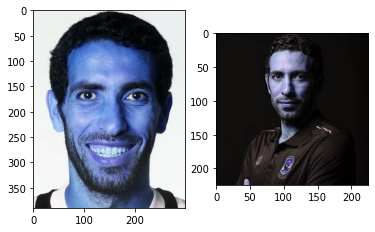

In [37]:
_, axarr = plt.subplots(nrows=1, ncols=2)
axarr[0].imshow(aboutrika_happy)
axarr[1].imshow(aboutrika_natural)

In [17]:
happy_preds = DeepFace.analyze(aboutrika_happy, actions=['emotion'])
neutral_preds = DeepFace.analyze(aboutrika_natural, actions=['emotion'])

In [126]:
happy_preds_dom = happy_preds['dominant_emotion']
neutral_preds_dom = neutral_preds['dominant_emotion']

In [127]:
print(f'The dominant emotion in the 1st image is {happy_preds_dom}')
print(f'The dominant emotion in the 2nd image is {neutral_preds_dom}')

The dominant emotion in the 1st image is happy
The dominant emotion in the 2nd image is neutral


### 2.2 Drawing rectangles around the face using opencv and the harcascade algorithm

In [85]:
# cv2.data.haarcascades + 
# '/home/shrbo/working/projects/assets/haarcascade_frontalface_default.xml'
face_cascade = cv2.CascadeClassifier()
face_cascade.load(cv2.data.haarcascades +
                  './haarcascade_frontalface_default.xml')

True

In [86]:
# Change teh image into gray scale(
happy_trika_gray = cv2.cvtColor(aboutrika_happy, cv2.COLOR_BGR2GRAY)

# face_cascade.empty()
face_pos = face_cascade.detectMultiScale(happy_trika_gray, 1.1, 4)
# face_pos.empty()
# type(face_pos)

for (x, y, w, h) in face_pos:
    cv2.rectangle(aboutrika_happy, (x, y), (x+w, y+h), (0, 255, 0), 2)

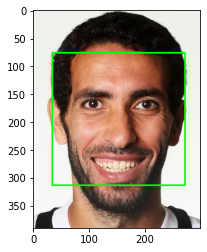

In [88]:
plt.imshow(cv2.cvtColor(aboutrika_happy, cv2.COLOR_BGR2RGB))

In [93]:
face_pos_2 = face_cascade.detectMultiScale(cv2.cvtColor(aboutrika_natural, cv2.COLOR_BGR2GRAY), 1.1, 4)
face_pos_2[0][0]

array([[63, 31, 87, 87]], dtype=int32)

In [95]:
x, y, h, w = face_pos_2[0]

In [121]:
neutral_img = cv2.rectangle(aboutrika_neutral, (x,y), (x+h,y+w), (0,0,255), 3)

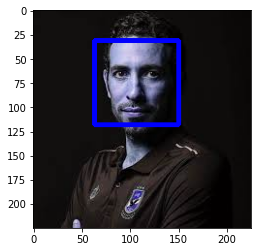

In [122]:
plt.imshow(neutral_img)

### 2.3 Adding the prediction to the image 

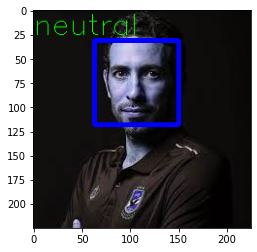

In [130]:
# neutral_preds_dom
cv2.putText(neutral_img, neutral_preds_dom, (0, 25),
           cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0))
plt.imshow(neutral_img)


### 3. Using deepface in realtime dataset
__Doing the above logic for videos__

### 3.1 Creating a function that will handle most of the processing

In [182]:
def emotion_rec(img):
    # GET PREDICTIONS
    preds = DeepFace.analyze(img, actions=['emotion'])
    label = preds['dominant_emotion']
    
    # GET FACE POSITION
    face_pos = face_cascade.detectMultiScale(
        cv2.cvtColor(img, cv2.COLOR_BGR2GRAY),
        1.1, 4)
    
    x, y, h, w = face_pos[0]
    
    #DRAW RECTANGLE
    img = cv2.rectangle(img, (x,y), (x+h,y+w), (0,255,0), 1)
    
    # PUT TEXT
    cv2.putText(img, label, (800, 100),
                cv2.FONT_HERSHEY_SIMPLEX, 4, (255, 0, 0), thickness=5)
    
    return img

### 3.2 Capturing a video

In [183]:
cap = cv2.VideoCapture('./assets/buzzfeedClip.mp4')

while True:
    ret, frame = cap.read()
    frame = emotion_rec(frame)
    
    cv2.imshow('frame',frame)
    
    k=cv2.waitKey(10)
    if k == ord('q'):
        break

# cap.release()
cv2.destroyAllWindows()

The credit for this videos goes for [buzzfeed youtube](https://www.youtube.com/watch?v=tiicx0d7yBg) channle